In [2]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import scipy
from scipy import stats
import gffutils
from Bio import Phylo
import matplotlib.pyplot as plt

In [8]:
#update table : new genome accession id --> old one (currently used) 
df_species = pd.read_csv('/home/collot/stage/collot/PrimateData/PrimateInfo.csv',sep='\t')
df_species = df_species.sort_values(by='Assembly Accession')
df_species['Assembly Accession'] = df_species['Assembly Accession'].replace('GCF_043159975.1', 'GCF_000956065.1')
pd.DataFrame.to_csv(df_species,'/home/collot/stage/collot/collot/out_stats/df_species.tsv',sep='\t')

In [ ]:
def create_table (df_species,path_to_df_dir, path_to_output) : 
    """Create a table with statistics for each specie"""
    list_species = []
    for index, row in df_species.iterrows(): 
        path_dir= os.path.join(path_to_df_dir,row['Assembly Accession'])
        df = pd.read_csv(os.path.join(path_dir,'df'))
        df_exons = pd.read_csv(os.path.join(path_dir,'df_exons'))
        df_introns = pd.read_csv(os.path.join(path_dir,'df_introns'))
        df_stats = pd.read_csv(os.path.join(path_dir,'df_stats'))
        specie = []
        specie.append(row['Organism Name'])
        specie.append(row['Assembly Accession'])
        genes_mean_length = np.mean(df_stats['length'])
        specie.append(genes_mean_length)
        nb_genes = len(df['gene'].unique())
        specie.append(nb_genes)        
        nb_trancripts = len(df['transcript'].unique())
        specie.append(nb_trancripts)        
        nb_exons = len(df_exons)
        specie.append(nb_exons) 
        exons_mean_length = np.mean(df_exons['length'])       
        specie.append(exons_mean_length)
        exon_ratio = np.mean(df_stats['ratio_exons'])        
        specie.append(exon_ratio) 
        nb_introns = len(df_introns)
        specie.append(nb_introns)  
        intron_mean_length = np.mean(df_introns['length']) 
        specie.append(intron_mean_length)             
        intron_ratio = np.mean(df_stats['ratio_introns'])
        specie.append(intron_ratio)
        list_species.append(specie)
    table_species = pd.DataFrame(list_species, 
                                 columns=('specie_name','genome_id','genes_mean_length','nb_genes','nb_transcripts','nb_exons','exons_mean_length','exon_ratio','nb_introns','introns_mean_length','intron_ratio'))
    table_species = table_species.sort_values(by='genome_id')
    table_species.to_csv(path_to_output)
    return table_species

df_table=create_table(df_species,'/home/collot/stage/collot/collot/out_stats/output_dataframes', '/home/collot/stage/collot/collot/out_stats/table_species.csv')
print(df_table)


                        specie_name         genome_id  genes_mean_length  \
0                      Homo sapiens  GCF_000001405.40       59033.034256   
1                  Carlito syrichta   GCF_000164805.1       41794.334183   
2                Microcebus murinus   GCF_000165445.2       53891.736750   
3                Otolemur garnettii   GCF_000181295.1       49881.267563   
4      Colobus angolensis palliatus   GCF_000951035.1       57209.445754   
5            Mandrillus leucophaeus   GCF_000951045.1       56736.680219   
6                   Cercocebus atys   GCF_000955945.1       59925.895896   
34                Macaca nemestrina   GCF_000956065.1       61083.381596   
7             Propithecus coquereli   GCF_000956105.1       48496.640520   
8                    Cebus imitator   GCF_001604975.1       52930.644031   
9               Rhinopithecus bieti   GCF_001698545.2       50687.277999   
10        Piliocolobus tephrosceles   GCF_002776525.5       54651.673309   
11          

/tmp/ipykernel_721288/888522806.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  distance_df.loc[i][j]=tree.distance(i,j)


['Nycticebus coucang', 'Otolemur garnettii', 'Propithecus coquereli', 'Microcebus murinus', 'Lemur catta', 'Eulemur rufifrons', 'Aotus nancymaae', 'Callithrix jacchus', 'Cebus imitator', 'Sapajus apella', 'Saimiri boliviensis boliviensis', 'Symphalangus syndactylus', 'Hylobates moloch', 'Nomascus leucogenys', 'Gorilla gorilla gorilla', 'Homo sapiens', 'Pan paniscus', 'Pan troglodytes', 'Pongo pygmaeus', 'Pongo abelii', 'Chlorocebus sabaeus', 'Papio anubis', 'Theropithecus gelada', 'Mandrillus leucophaeus', 'Cercocebus atys', 'Macaca thibetana thibetana', 'Macaca mulatta', 'Macaca fascicularis', 'Macaca nemestrina', 'Trachypithecus francoisi', 'Rhinopithecus roxellana', 'Rhinopithecus bieti', 'Piliocolobus tephrosceles', 'Colobus angolensis palliatus', 'Carlito syrichta']
                              Nycticebus_coucang  Otolemur_garnettii  \
Nycticebus_coucang                      0.000000           78.078600   
Otolemur_garnettii                     78.078600            0.000000   
Pr

<Axes: >

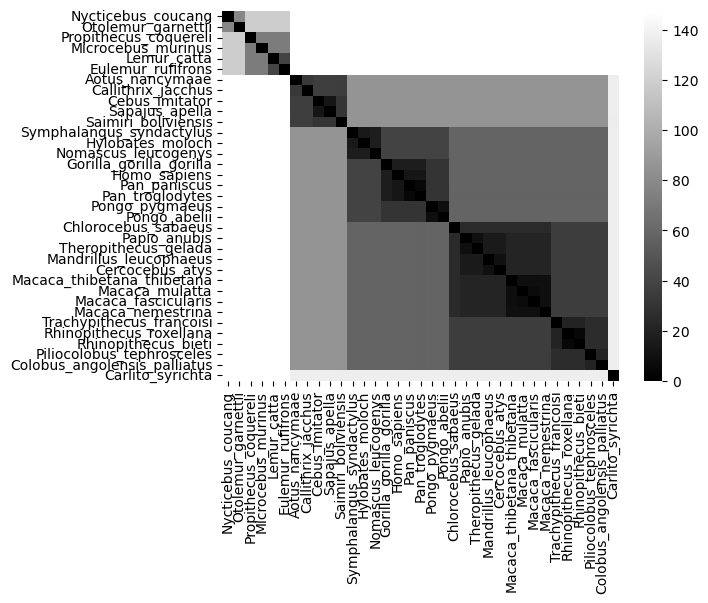

In [ ]:
#create a distance matrix from the phylogenic tree and it's heatmap
tree = Phylo.read('/home/collot/stage_git/species_tree.nwk', format='newick')
taxa = []
for term in tree.get_terminals():
    taxa.append(term.name)
distance_df = pd.DataFrame(index = taxa, columns=taxa)
for i in taxa: 
    for j in taxa : 
        distance_df.loc[i][j]=tree.distance(i,j)
distance_df= distance_df.astype(float)
specie_order = distance_df.index.to_list() #create a list with species in a fixed order to use for the other heatmaps
specie_order[10] ='Saimiri_boliviensis_boliviensis' #change the name used by TimeTree for the one I use
specie_order = [name.replace('_', ' ') for name in specie_order] 
sns.heatmap(distance_df, cmap='grey',xticklabels=True, yticklabels=True  )

In [ ]:
#stat used : nb exons --> statistics
def create_df (df_table, path_to_df_dir) : 
    """Create a ks_score matrix in a dataframe"""
    genid_species = dict(zip(df_table['genome_id'], df_table['specie_name']))
    genomes_list = []
    species_list = []
    df=[]
    for genome in os.scandir(path_to_df_dir): 
        genomes_list.append(genome.name)
        species_list.append(genid_species.get(genome.name))
    for i in range(len(genomes_list)): 
        path_dir= os.path.join(path_to_df_dir,genomes_list[i])
        df_stats_i = pd.read_csv(os.path.join(path_dir,'df_stats'))
        row = []
        for j in range(len(genomes_list)):
            path_dir= os.path.join(path_to_df_dir,genomes_list[j])
            df_stats_j = pd.read_csv(os.path.join(path_dir,'df_stats'))
            ks_score = scipy.stats.ks_2samp(df_stats_i['nb_exons'], df_stats_j['nb_exons'],nan_policy='omit')
            row.append(ks_score.statistic)
        df.append(row)

    df_ks_i = pd.DataFrame(df, columns=species_list, index=species_list)
    df_ks_i = df_ks_i.reindex(index=specie_order, columns=specie_order)
    print(species_list)
    return df_ks_i
df_ks_i = create_df(df_table, '/home/collot/stage/collot/out_stats/output_dataframes')
print(df_ks_i)


['Piliocolobus tephrosceles', 'Nycticebus coucang', 'Rhinopithecus roxellana', 'Papio anubis', 'Saimiri boliviensis boliviensis', 'Lemur catta', 'Macaca nemestrina', 'Pan troglodytes', 'Hylobates moloch', 'Trachypithecus francoisi', 'Cebus imitator', 'Pongo abelii', 'Sapajus apella', 'Macaca thibetana thibetana', 'Macaca mulatta', 'Mandrillus leucophaeus', 'Colobus angolensis palliatus', 'Otolemur garnettii', 'Theropithecus gelada', 'Pongo pygmaeus', 'Cercocebus atys', 'Propithecus coquereli', 'Chlorocebus sabaeus', 'Macaca fascicularis', 'Symphalangus syndactylus', 'Nomascus leucogenys', 'Rhinopithecus bieti', 'Gorilla gorilla gorilla', 'Aotus nancymaae', 'Callithrix jacchus', 'Homo sapiens', 'Carlito syrichta', 'Microcebus murinus', 'Pan paniscus', 'Eulemur rufifrons']
                                 Nycticebus coucang  Otolemur garnettii  \
Nycticebus coucang                         0.000000            0.057513   
Otolemur garnettii                         0.057513            0.000

In [10]:
#stat used : intron ratio --> p-value
def create_df (df_table, path_to_df_dir) :
    """Create a ks_score matrix in a dataframe""" 
    genid_species = dict(zip(df_table['genome_id'], df_table['specie_name']))
    genomes_list = []
    species_list = []
    df=[]
    for genome in os.scandir(path_to_df_dir): 
        genomes_list.append(genome.name)
        species_list.append(genid_species.get(genome.name))
    for i in range(len(genomes_list)): 
        path_dir= os.path.join(path_to_df_dir,genomes_list[i])
        df_stats_i = pd.read_csv(os.path.join(path_dir,'df_stats'))
        row = []
        for j in range(len(genomes_list)):
            path_dir= os.path.join(path_to_df_dir,genomes_list[j])
            df_stats_j = pd.read_csv(os.path.join(path_dir,'df_stats'))
            ks_score = scipy.stats.ks_2samp(df_stats_i['ratio_introns'], df_stats_j['ratio_introns'],nan_policy='omit')
            row.append(ks_score.pvalue)
        df.append(row)
    df_ks = pd.DataFrame(df, columns=species_list, index=species_list)
    df_ks = df_ks.reindex(index=specie_order, columns=specie_order)
    return df_ks
df_ks = create_df(df_table, '/home/collot/stage/collot/out_stats/output_dataframes')

NameError: name 'df_table' is not defined

In [ ]:
#masks hide half of the heatmap
mask1 = np.tril(np.ones_like(df_ks, dtype=bool))
mask2 = np.triu(np.ones_like(distance_df, dtype=bool))
#heatmap half distances, half pvalue of intron ratio, half distances
fig, ax = plt.subplots(figsize=(11, 6))
sns.heatmap(df_ks, mask=mask1, cmap=sns.cm.rocket_r, vmax=.05 ,xticklabels=True, yticklabels=True )
sns.heatmap(distance_df, mask=mask2, cmap='grey',xticklabels=True, yticklabels=True)

NameError: name 'df_ks' is not defined

<Axes: >

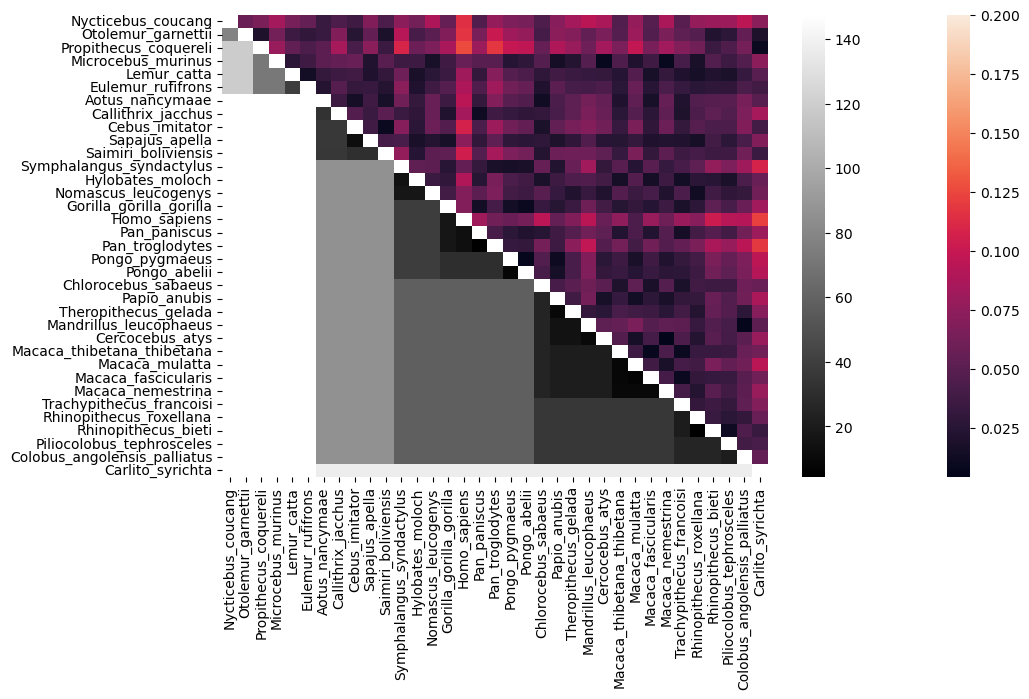

In [ ]:
#heatmap half distances, half statistics of number of introns, half distances
fig, ax = plt.subplots(figsize=(11, 6))
sns.heatmap(df_ks_i, mask=mask1, vmax=.2, xticklabels=True, yticklabels=True )
sns.heatmap(distance_df, mask=mask2, cmap='grey',xticklabels=True, yticklabels=True  )